In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.inspection import permutation_importance


In [2]:
dataset = pd.read_csv("PortScan.csv")

In [5]:
#STEP 2- datapreprocessing
#2.1-missing and duplicate data handling
print("Missing values:")
print(dataset.isnull().sum().sum())
print("\nDuplicate rows:")
print(dataset.duplicated().sum())
print("\nNan rows:")
print(dataset.isna().sum().sum())

Missing values:
0

Duplicate rows:
0

Nan rows:
0


In [4]:
dataset = dataset.dropna()
dataset = dataset.drop_duplicates()

In [6]:
dataset.reset_index(drop=True)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214094,443,196135,49,57,1331,105841,570,0,27.163265,108.067176,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
214095,443,378424,49,59,1325,104393,570,0,27.040816,108.095051,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
214096,443,161800,70,103,1427,215903,570,0,20.385714,90.746389,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
214097,443,142864,50,62,1331,110185,570,0,26.620000,107.027727,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [7]:
dataset.isnull().values.any()

False

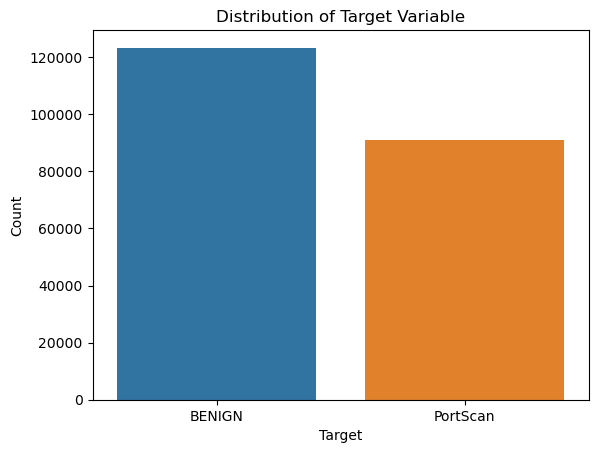

In [8]:
#2.2-exploratory data analysis(visualization)

sns.countplot(x=' Label', data=dataset)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')
plt.show()

In [9]:
#2.3-feature selection
#-spliting dataset into features and labels
X = dataset.drop(' Label', axis=1)
y = dataset[' Label']

In [10]:
#train your HistGradientBoostingClassifier
clf = HistGradientBoostingClassifier()
clf.fit(X, y)

HistGradientBoostingClassifier()

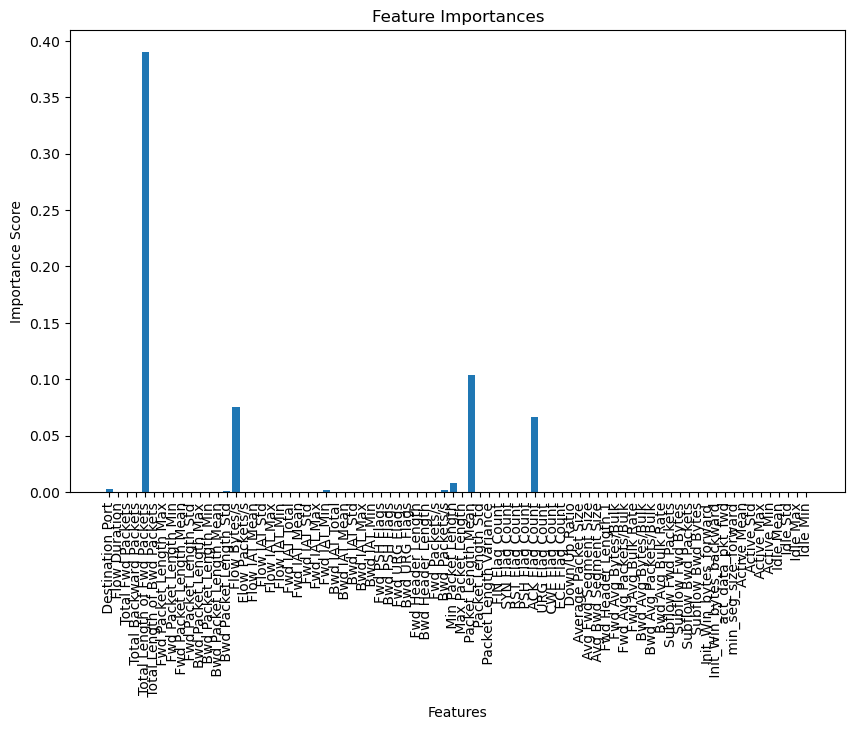

In [27]:
#calculate permutation importances
result = permutation_importance(clf, X, y, n_repeats=20, random_state=42)
feature_importances = result.importances_mean

#get names of all features
all_features = X.columns

#graph it down
plt.figure(figsize=(10, 6))
plt.bar(range(len(all_features)), feature_importances, tick_label=all_features)
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=90)
plt.show()

In [39]:
#table representation
importance_df = pd.DataFrame({'Feature': all_features, 'Importance': feature_importances})
importance_df['Importance'] = importance_df['Importance'] * 100 
#descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

pd.set_option('display.max_rows', None)
print(importance_df)

                         Feature  Importance
4    Total Length of Fwd Packets   39.004643
40            Packet Length Mean   10.378773
14                  Flow Bytes/s    7.530301
47                ACK Flag Count    6.685786
38             Min Packet Length    0.775319
0               Destination Port    0.265531
24                   Fwd IAT Min    0.183023
37                 Bwd Packets/s    0.149183
13         Bwd Packet Length Std    0.113382
66        Init_Win_bytes_forward    0.021579
29                   Bwd IAT Min    0.019010
67       Init_Win_bytes_backward    0.001681
77                      Idle Min    0.001214
5    Total Length of Bwd Packets    0.001168
1                  Flow Duration    0.001004
19                  Flow IAT Min    0.000514
12        Bwd Packet Length Mean    0.000467
41             Packet Length Std    0.000420
35             Bwd Header Length    0.000420
18                  Flow IAT Max    0.000420
69          min_seg_size_forward    0.000304
16        

In [52]:
X_selected_features = X[['Total Length of Fwd Packets', ' Packet Length Mean', 'Flow Bytes/s', ' ACK Flag Count',
                     ' Min Packet Length', ' Destination Port', ' Fwd IAT Min', ' Bwd Packets/s', ' Bwd Packet Length Std',
                     'Init_Win_bytes_forward', ' Bwd IAT Min', ' Init_Win_bytes_backward', ' Idle Min',
                     ' Total Length of Bwd Packets', ' Flow Duration', ' Flow IAT Min', ' Bwd Packet Length Mean',
                     ' Packet Length Std', ' Bwd Header Length', ' Flow IAT Max', ' min_seg_size_forward',
                     ' Flow IAT Mean', ' Fwd Packet Length Max', ' Fwd IAT Mean', ' Flow Packets/s', ' Fwd Header Length']]
X_selected_features.head()

,Total Length of Fwd Packets,Packet Length Mean,Flow Bytes/s,ACK Flag Count,Min Packet Length,Destination Port,Fwd IAT Min,Bwd Packets/s,Bwd Packet Length Std,Init_Win_bytes_forward,...,Bwd Packet Length Mean,Packet Length Std,Bwd Header Length,Flow IAT Max,min_seg_size_forward,Flow IAT Mean,Fwd Packet Length Max,Fwd IAT Mean,Flow Packets/s,Fwd Header Length
0,2664,111.837209,7595.104640,0,0,22,2,34.745748,312.675250,29200,...,158.045455,239.686848,1424,948537,32,15075.50000,456,31658.550,67.122468,1328
1,2664,111.837209,7289.936810,0,0,22,1,33.349680,312.675250,29200,...,158.045455,239.686848,1424,955790,32,15706.58333,456,32983.825,64.425518,1328
2,0,0.000000,0.000000,1,0,22,0,6250.000000,0.000000,290,...,0.000000,0.000000,32,160,32,160.00000,0,0.000,12500.000000,32
3,2728,111.452381,7182.267884,0,0,22,1,32.221240,319.121427,29200,...,157.952381,241.642791,1360,956551,32,15896.19512,456,32587.200,63.675308,1328
4,0,0.000000,0.000000,1,0,35396,0,25974.025970,0.000000,243,...,0.000000,0.000000,64,49,32,38.50000,0,0.000,38961.038960,32


In [58]:
X_selected_features.isna().sum().sum()

0

In [61]:
#2.4-encoding y since its categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [62]:
print(y[:5])

[0 0 0 0 0]


In [64]:
# STEP 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, test_size=0.2, random_state=42)

Classifier: HistGradientBoosting
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
AUC: 1.0



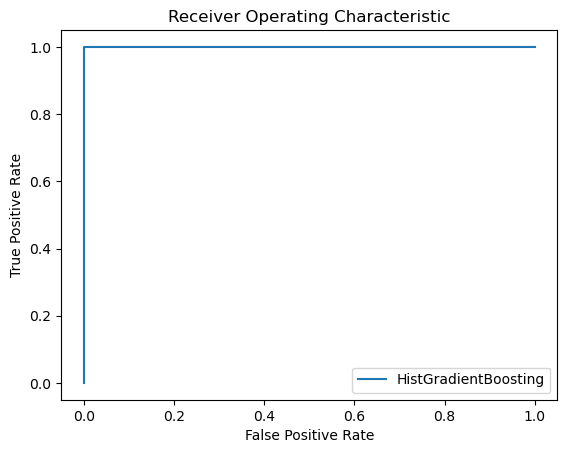

In [77]:
# Initialize classifiers
classifiers = [
    ("HistGradientBoosting", HistGradientBoostingClassifier()),
    ]

# Evaluate each classifier
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Calculate ROC curve and AUC
    y_scores = classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = roc_auc_score(y_test, y_scores)
    
    # Print evaluation metrics
    print("Classifier:", name)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("AUC:", roc_auc)
    print()
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=name)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()


In [ ]:
joblib.dump(clf, 'model.pkl')